# Predictive Analysis of Gas Turbine Component Degradation in Naval Vessels 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import joblib

In [2]:
# "Lever position (lp) [ ]",
#     "Ship speed (v) [knots]",
#     "Gas Turbine shaft torque (GTT) [kN m]",
#     "Gas Turbine rate of revolutions (GTn) [rpm]",
#     "Gas Generator rate of revolutions (GGn) [rpm]",
#     "Starboard Propeller Torque (Ts) [kN]",
#     "Port Propeller Torque (Tp) [kN]",
#     "HP Turbine exit temperature (T48) [C]",
#     "GT Compressor inlet air temperature (T1) [C]",
#     "GT Compressor outlet air temperature (T2) [C]",
#     "HP Turbine exit pressure (P48) [bar]",
#     "GT Compressor inlet air pressure (P1) [bar]",
#     "GT Compressor outlet air pressure (P2) [bar]",
#     "Gas Turbine exhaust gas pressure (Pexh) [bar]",
#     "Turbine Injection Control (TIC) [%]",
#     "Fuel flow (mf) [kg/s]"
#     "GT Turbine decay state coefficient."


headers = [
    "LP",
    "V",
    "GTT",
    "GTN",
    "GGN",
    "TS",
    "TP",
    "T48",
    "T1",
    "T2",
    "P48",
    "P1",
    "P2",
    "PEXH",
    "TIC",
    "MF",
    "comp_decay_state",
    "turb_decay_state"
]

# Load the .txt file with defined columns
df = pd.read_csv('data.txt', delim_whitespace=True, names=headers)
df

,LP,V,GTT,GTN,GGN,TS,TP,T48,T1,T2,P48,P1,P2,PEXH,TIC,MF,comp_decay_state,turb_decay_state
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15.0,21624.934,1924.342,8470.013,175.239,175.239,681.658,288.0,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,18.0,29763.213,2306.745,8800.352,245.954,245.954,747.405,288.0,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,7.148,21.0,39003.867,2678.052,9120.889,332.389,332.389,796.457,288.0,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,24.0,50992.579,3087.434,9300.274,438.024,438.024,892.945,288.0,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LP                11934 non-null  float64
 1   V                 11934 non-null  float64
 2   GTT               11934 non-null  float64
 3   GTN               11934 non-null  float64
 4   GGN               11934 non-null  float64
 5   TS                11934 non-null  float64
 6   TP                11934 non-null  float64
 7   T48               11934 non-null  float64
 8   T1                11934 non-null  float64
 9   T2                11934 non-null  float64
 10  P48               11934 non-null  float64
 11  P1                11934 non-null  float64
 12  P2                11934 non-null  float64
 13  PEXH              11934 non-null  float64
 14  TIC               11934 non-null  float64
 15  MF                11934 non-null  float64
 16  comp_decay_state  11934 non-null  float6

**indicates no null values in dataset**

In [4]:
df.describe()

,LP,V,GTT,GTN,GGN,TS,TP,T48,T1,T2,P48,P1,P2,PEXH,TIC,MF,comp_decay_state,turb_decay_state
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.220539e-16,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


**The mean and median values are close to each other, indicating that the data exhibits minimal outliers.**

In [5]:
df.drop("comp_decay_state", axis=1,inplace=True)

In [6]:
df

,LP,V,GTT,GTN,GGN,TS,TP,T48,T1,T2,P48,P1,P2,PEXH,TIC,MF,turb_decay_state
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15.0,21624.934,1924.342,8470.013,175.239,175.239,681.658,288.0,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.000
11930,6.175,18.0,29763.213,2306.745,8800.352,245.954,245.954,747.405,288.0,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.000
11931,7.148,21.0,39003.867,2678.052,9120.889,332.389,332.389,796.457,288.0,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.000
11932,8.206,24.0,50992.579,3087.434,9300.274,438.024,438.024,892.945,288.0,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.000


In [7]:
df.drop(["T1","P1"], axis=1,inplace=True)

**Features T1 and P1, which exhibit constant values across the entire dataset, are being removed as they do not provide any meaningful information for prediction**

In [8]:
df.shape

(11934, 15)

In [9]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
num_duplicates

0

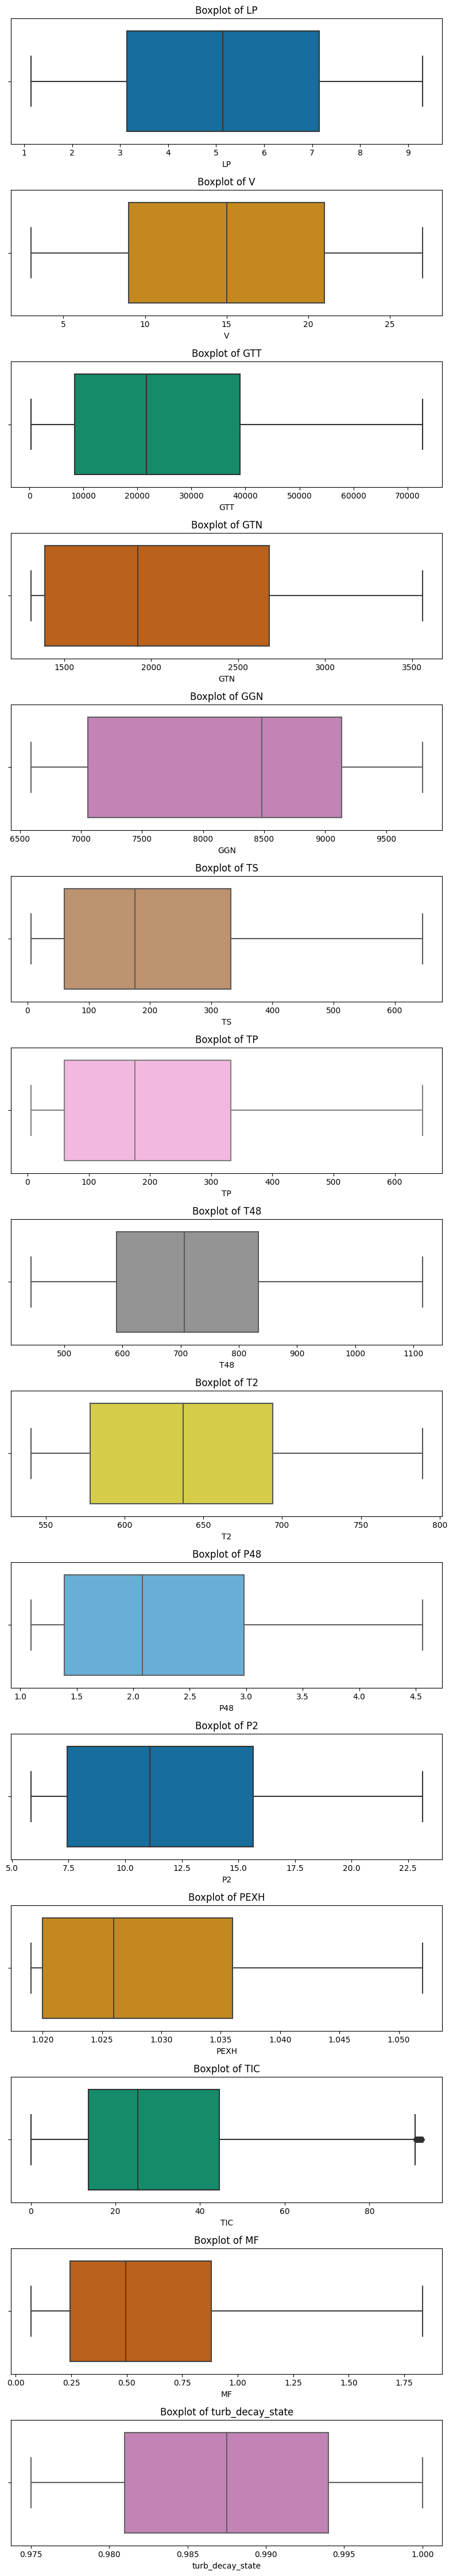

In [10]:

colors = sns.color_palette("colorblind", len(df.columns))  # You can choose different palettes

num_columns = len(df.columns)
plt.figure(figsize=(8, 3 * num_columns))  # Adjust the figure size as needed

for i, (column, color) in enumerate(zip(df.columns, colors)):
    plt.subplot(len(df.columns), 1, i + 1)
    sns.boxplot(data=df, x=column, color=color)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


EDA

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

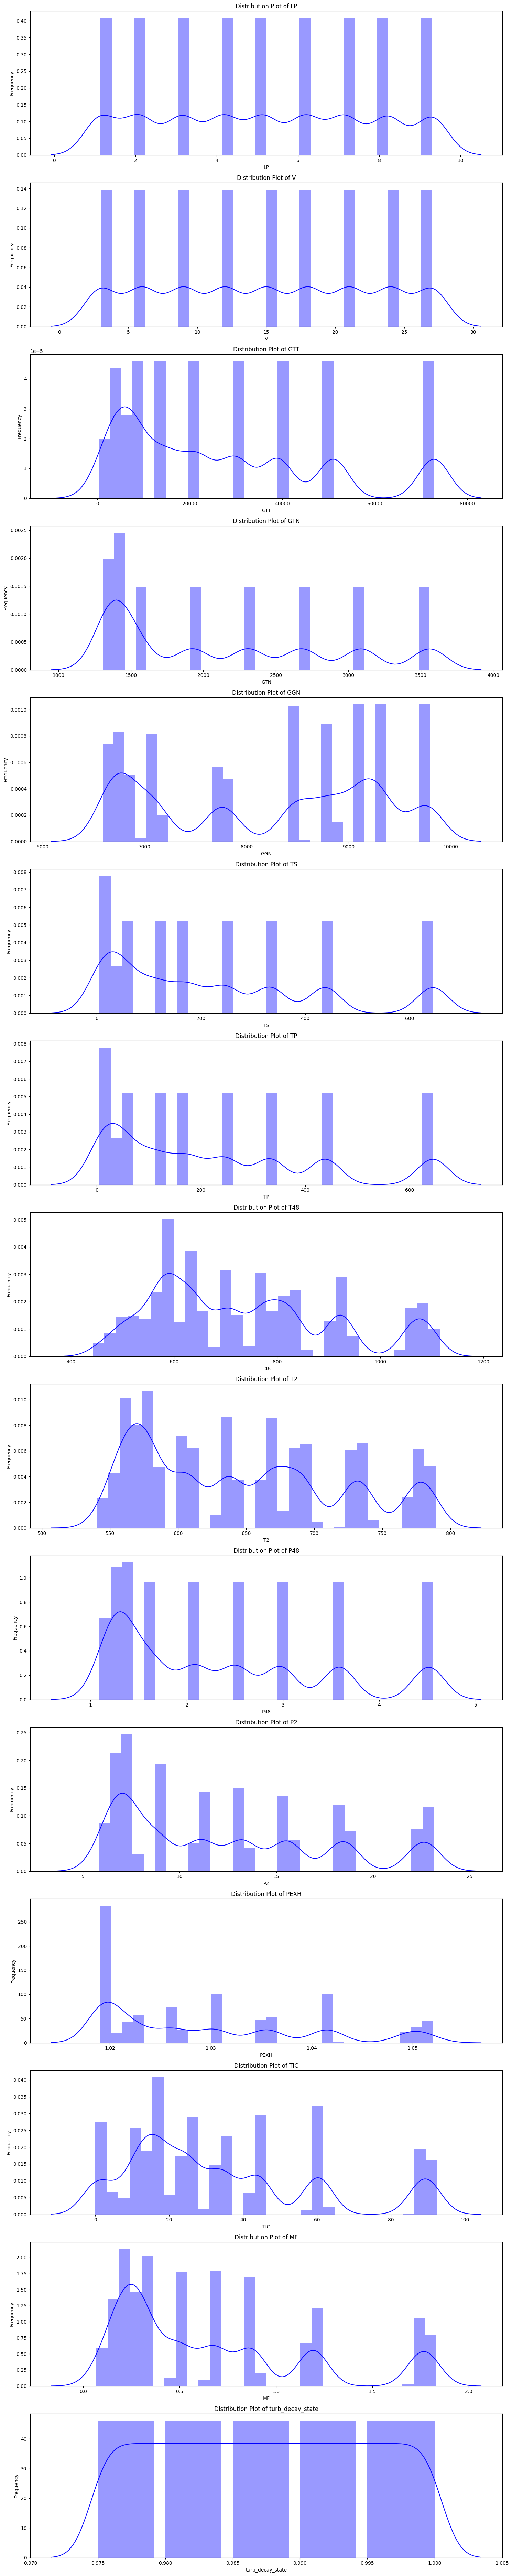

In [11]:
# Generate distribution plots for all features
num_columns = len(df.columns)
plt.figure(figsize=(15, 5 * num_columns))  # Adjust the figure size as needed

for i, column in enumerate(df.columns):
    plt.subplot(num_columns, 1, i + 1)
    sns.distplot(df[column], kde=True, color='blue', bins=30)  # Adjust the number of bins as needed
    plt.title(f'Distribution Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Bivariate analysis

In [12]:
# sns.pairplot(df,hue='turb_decay_state')
# plt.show()

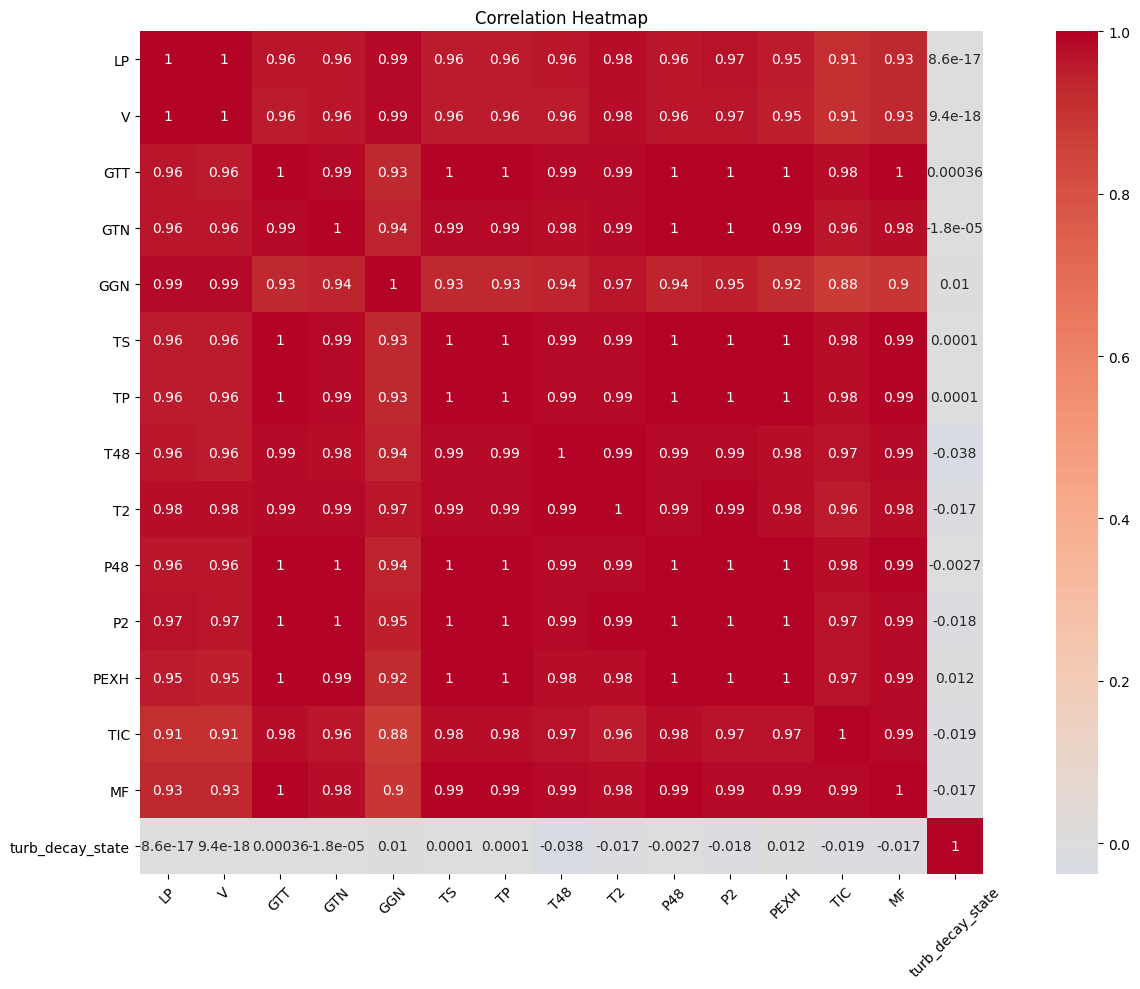

In [13]:
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)

# Customize plot (optional)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

**Given that the majority of features exhibit a high degree of correlation, it is essential to implement feature selection to identify the most significant features. This process will enhance model performance by reducing redundancy and focusing on the most informative variables.**

In [14]:
X = df.drop(columns=['turb_decay_state'])
y = df['turb_decay_state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso()
parameters = {'alpha': np.logspace(-4, 4, 50)}
lasso_cv = GridSearchCV(lasso, parameters, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

# Best alpha value
best_alpha = lasso_cv.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_scaled, y_train)
selected_features = X.columns[(lasso_best.coef_ != 0)]
print(f"Selected features: {selected_features}")
y_pred = lasso_best.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_best.coef_})
feature_importance = feature_importance[feature_importance['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False)
print(feature_importance)

Best alpha: 0.0001
Selected features: Index(['GGN', 'T48', 'PEXH'], dtype='object')
Mean Squared Error: 5.3594028895999785e-05
   Feature  Coefficient
11    PEXH     0.004030
4      GGN     0.001171
7      T48    -0.005207


**Implemented Lasso (L1) regularization for feature selection, resulting in the identification of the most influential features.
with best alpha = 0.0001 and influential features are GGN ,T48,PEXH**

In [15]:
X_lasso_selected = df[selected_features]
X_lasso_selected

,GGN,T48,PEXH
0,6677.380,464.006,1.019
1,6828.469,635.401,1.019
2,7111.811,606.002,1.020
3,7792.630,661.471,1.022
4,8494.777,731.494,1.026
...,...,...,...
11929,8470.013,681.658,1.027
11930,8800.352,747.405,1.031
11931,9120.889,796.457,1.036
11932,9300.274,892.945,1.043


In [16]:
y.unique()

array([0.975, 0.976, 0.977, 0.978, 0.979, 0.98 , 0.981, 0.982, 0.983,
       0.984, 0.985, 0.986, 0.987, 0.988, 0.989, 0.99 , 0.991, 0.992,
       0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999, 1.   ])

<Axes: >

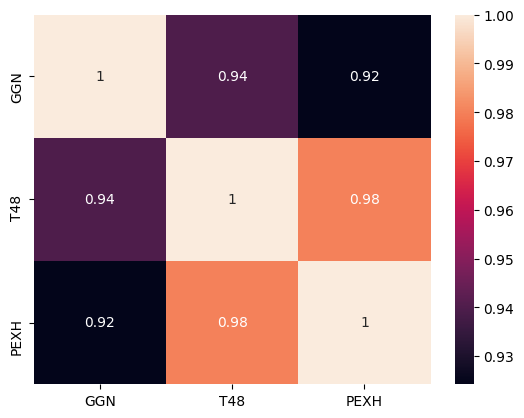

In [17]:
corr_selected = X_lasso_selected.corr()
sns.heatmap(corr_selected,annot=True)

In [18]:
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

**To select the most effective model, implementing and evaluate a range of predictive models**

In [19]:
def model_regression(X, y):
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    n, p = x_test.shape
    models = [LinearRegression(), Ridge(), Lasso(), RandomForestRegressor(), GradientBoostingRegressor()]
    
    results = []
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        adj_r2 = adjusted_r2_score(r2, n, p)
        
        print("Model: ", model)
        print("Mean Squared Error: ", mse)
        print("R-squared: ", r2)
        print("Adjusted R-squared: ", adj_r2)
        print("-" * 50)
        
        results.append(adj_r2)
    
    # Best model
    best_model = models[results.index(max(results))]
    print("Best Model: ", best_model)
    print("Best Model adjusted R-squared: ", max(results))
    
    model_names = ['LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor', 'GradientBoostingRegressor']
    models_df = pd.DataFrame({
        'Model': model_names,
        'Adjusted R-squared': results
    })
    
    print(models_df.sort_values(by='Adjusted R-squared', ascending=False, ignore_index=True))
    
    return best_model, max(results), mse

# Example usage

best_model, best_r2, best_mse = model_regression(X_lasso_selected, y)

Model:  LinearRegression()
Mean Squared Error:  5.216302853853972e-05
R-squared:  0.0806221373425714
Adjusted R-squared:  0.07985106281420351
--------------------------------------------------
Model:  Ridge()
Mean Squared Error:  5.542512605933887e-05
R-squared:  0.02312738808282344
Adjusted R-squared:  0.022308093188847744
--------------------------------------------------
Model:  Lasso()
Mean Squared Error:  5.681080682082973e-05
R-squared:  -0.001295354471009258
Adjusted R-squared:  -0.0021351325150160694
--------------------------------------------------
Model:  RandomForestRegressor()
Mean Squared Error:  4.292332030159146e-06
R-squared:  0.9243472789393717
Adjusted R-squared:  0.9242838296345963
--------------------------------------------------
Model:  GradientBoostingRegressor()
Mean Squared Error:  1.8255214296188495e-05
R-squared:  0.6782502785553762
Adjusted R-squared:  0.6779804297534937
--------------------------------------------------
Best Model:  RandomForestRegressor()

**Based on the report, it is evident that the Random Forest model demonstrates superior performance, as indicated by an Adjusted R² score of 0.9. Consequently, we will proceed with selecting the Random Forest model for further development and implementation.**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
print(X_lasso_selected)

            GGN       T48   PEXH
0      6677.380   464.006  1.019
1      6828.469   635.401  1.019
2      7111.811   606.002  1.020
3      7792.630   661.471  1.022
4      8494.777   731.494  1.026
...         ...       ...    ...
11929  8470.013   681.658  1.027
11930  8800.352   747.405  1.031
11931  9120.889   796.457  1.036
11932  9300.274   892.945  1.043
11933  9742.950  1038.411  1.052

[11934 rows x 3 columns]


In [22]:
df['PEXH'].min()

1.019

In [23]:
param_grid = { 
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    # 'max_depth' : [7, 8, 9],
    # 'criterion' :['gini', 'entropy']
}
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit the Grid Search model
grid_search.fit(X_lasso_selected, y)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation R-squared score: {best_score}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_features': 'sqrt', 'n_estimators': 200}
Best Cross-Validation R-squared score: 0.7534329170660932


**choosing Optimal hyperparameters for a RandomForest with grid search cv 
Result showing best value for n_estimators as 200 with R-square score as 0.75**

In [24]:
grid_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 200}

**Training random forest with best_params_ as hyperparameters**

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X_lasso_selected, y, test_size=0.3, random_state=42)
n,p = x_test.shape
best_params = grid_search.best_params_
rf = RandomForestRegressor(**best_params, random_state=42)

rf.fit(x_train, y_train)
rf.predict(x_test)
y_pred = rf.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = adj_r2 = adjusted_r2_score(r2, n, p)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

Mean Squared Error: 4.178434634180395e-06
R-squared: 0.9263547303357151
Adjusted R-squared: 0.9262929646636455


**Mean Squared Error: 4.263167997766108e-06
R-squared: 0.9248612975176483
Adjusted R-squared: 0.9247982793159578
Result showing model prediction accuracy of 0.92**


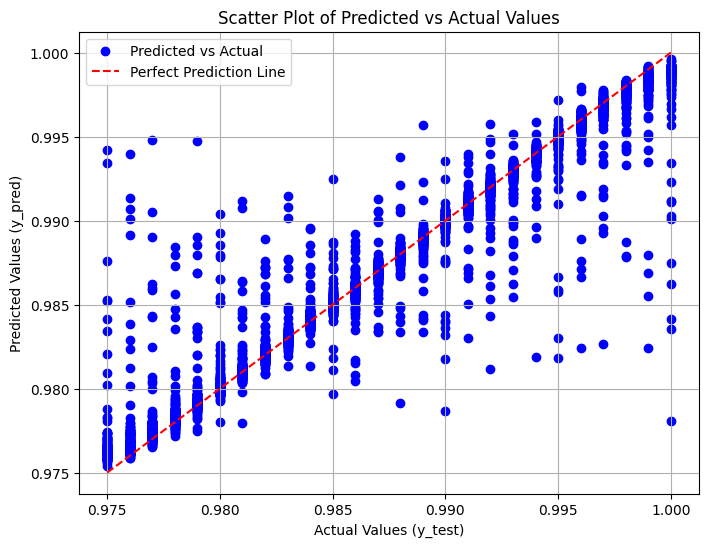

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

**The scatter plot shows a strong correlation between predicted and actual values, with most points closely aligned along the perfect prediction line.**

In [27]:
rf

RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=42)

In [29]:
joblib.dump(rf, 'predective_model.pkl')

['predective_model.pkl']

In [35]:
rows_with_target_value = df[df['turb_decay_state'] == 0.977]
rows_with_target_value

,LP,V,GTT,GTN,GGN,TS,TP,T48,T2,P48,P2,PEXH,TIC,MF,turb_decay_state
18,1.138,3.0,753.021,1371.886,6697.838,8.858,8.858,473.665,553.143,1.117,6.047,1.019,0.000,0.088,0.977
19,2.088,6.0,6961.726,1371.057,6830.364,27.259,27.259,635.133,581.244,1.330,7.262,1.019,13.192,0.289,0.977
20,3.144,9.0,8379.456,1386.759,7116.987,60.356,60.356,604.338,587.286,1.389,7.559,1.020,13.018,0.258,0.977
21,4.161,12.0,14724.616,1547.466,7796.657,113.801,113.801,659.666,613.524,1.657,8.989,1.022,18.023,0.357,0.977
22,5.140,15.0,21636.925,1924.315,8496.610,175.282,175.282,729.497,645.272,2.078,11.174,1.026,26.260,0.520,0.977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11722,5.140,15.0,21620.857,1924.306,8449.635,175.192,175.192,703.314,633.026,2.094,11.250,1.027,25.074,0.496,0.977
11723,6.175,18.0,29760.560,2306.817,8776.993,246.009,246.009,772.194,663.899,2.520,13.419,1.031,34.325,0.680,0.977
11724,7.148,21.0,39019.090,2677.906,9109.382,332.611,332.611,819.467,684.277,2.996,15.810,1.036,43.955,0.870,0.977
11725,8.206,24.0,50984.168,3087.114,9290.331,437.982,437.982,916.956,725.899,3.611,18.762,1.042,60.302,1.194,0.977
